## Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from importlib import reload
plt=reload(plt)

df = pd.read_csv("kc_final.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости

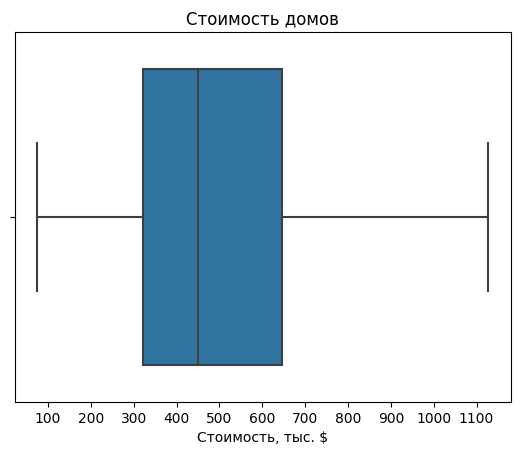

In [4]:
df['priceAsT'] = df['price'] / 1000
sbn.boxplot(x=df['priceAsT'], showfliers = False)
plt.title('Стоимость домов')
plt.xlabel("Стоимость, тыс. $")
plt.locator_params (axis='x', nbins= 20);

Большинство домов стоит 300-650 тыс.$

Типичный дом стоит ~ 450 тыс.$

1.3 Изучите распределение квадратуры жилой

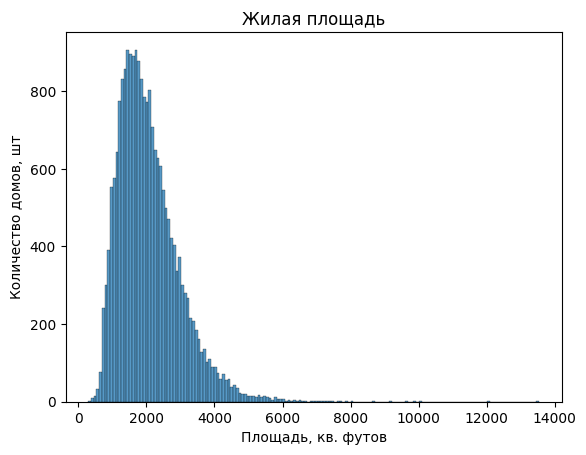

In [5]:
sbn.histplot(df['sqft_living'])
plt.title('Жилая площадь')
plt.xlabel("Площадь, кв. футов")
plt.ylabel("Количество домов, шт");

Большинство домов имеют площать 1-3 тыс кв. футов

1.4 Изучите распределение года постройки

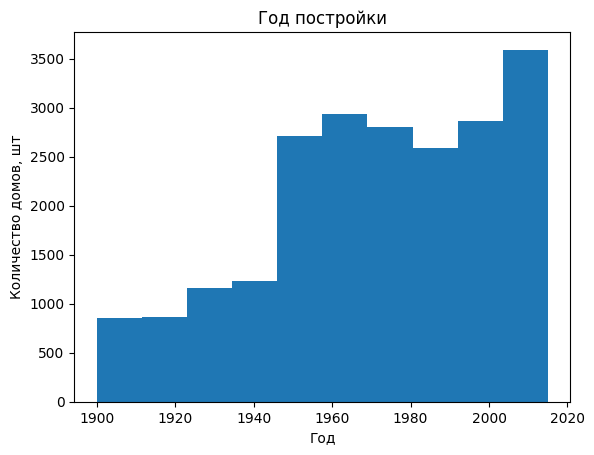

In [6]:
plt.hist(df['yr_built'])
plt.title('Год постройки')
plt.xlabel("Год")
plt.ylabel("Количество домов, шт");

После окончания 2й мировой войны наблюдается рост строительства

## Задача 2
2.1 Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

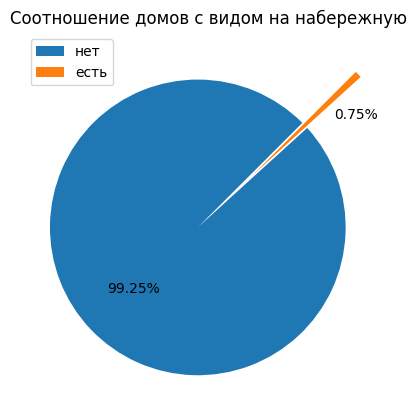

In [7]:
data = df['waterfront'].value_counts()
data.index = ['нет', "есть"]

patches, texts, autotexts = plt.pie(data, autopct='%1.2f%%', startangle=45, explode=[0.1, 0.4])
autotexts[1].set_x(1)

plt.legend(data.index)
plt.title('Соотношение домов с видом на набережную');

Менее процента домов имеют вид на набережную

2.2 Изучите распределение этажей домов

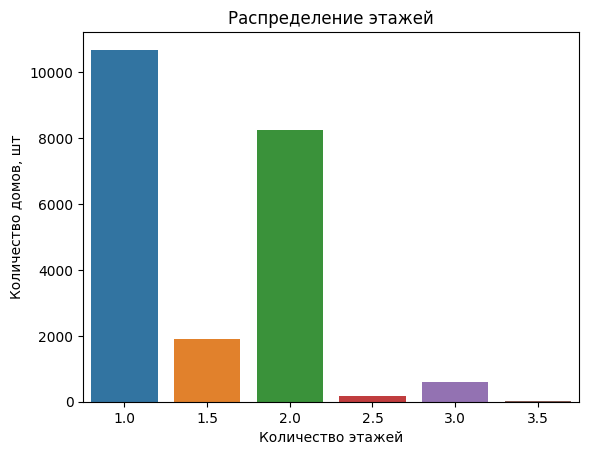

In [8]:
data = df['floors'].value_counts().reset_index()
sbn.barplot(x=data['floors'], y=data['count']);
plt.title('Распределение этажей')
plt.xlabel("Количество этажей")
plt.ylabel("Количество домов, шт");

Большинство домой 1-2 этажные. Имеются дома с дробным количеством этажей. Возможно так обозначены дома с мансардой

2.3 Изучите распределение состояния домов

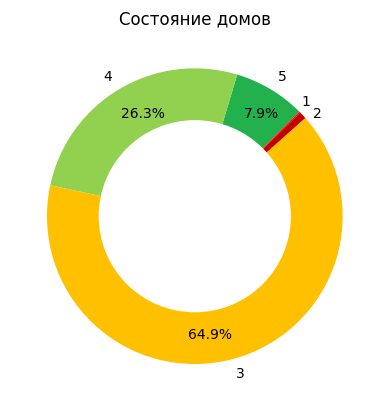

In [9]:
data = df['condition'].value_counts().sort_index(ascending=False)
pie_colors = ['#22B14C','#92D050','#FFC000','#C00000','#FF0000']

patches, texts, autotexts = plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=45, colors=pie_colors)
autotexts[4].set_text("")
autotexts[3].set_text("")
autotexts[2].set_y(-0.8)
autotexts[2].set_x(0.1)
autotexts[1].set_y(0.7)
autotexts[1].set_x(-0.35)
autotexts[0].set_y(0.7)
autotexts[0].set_x(0.45)
texts[3].set_x(0.8)
texts[3].set_y(0.7)
texts[4].set_x(0.72)
texts[4].set_y(0.78)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Состояние домов');

Практически нет домов в плохом состоянии. Большинство домов среднего состояния и лучше

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

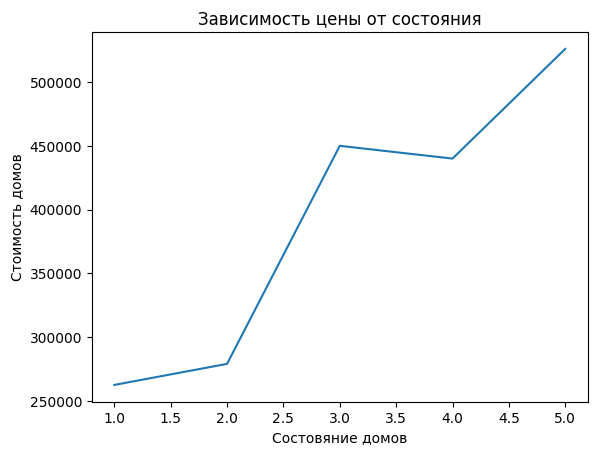

In [10]:
data = df.groupby('condition')['price'].agg('median').reset_index().sort_values('condition')
sbn.lineplot(x=data['condition'], y=data['price'])
plt.title('Зависимость цены от состояния')
plt.xlabel("Состовяние домов")
plt.ylabel("Стоимость домов");

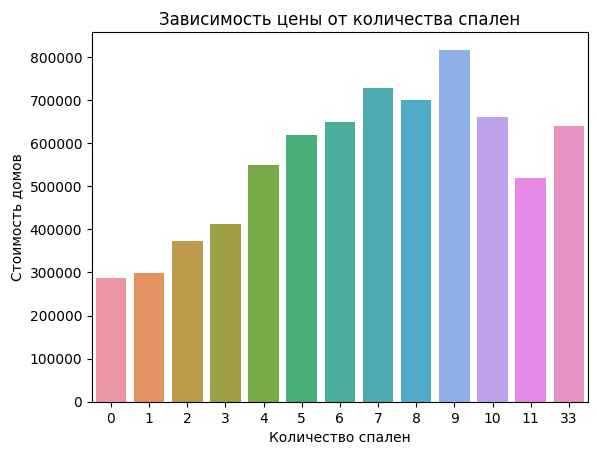

In [19]:
data = df.groupby('bedrooms')['price'].agg('median').reset_index().sort_values('bedrooms')
sbn.barplot(x=data['bedrooms'], y=data['price'])
plt.title('Зависимость цены от количества спален')
plt.xlabel("Количество спален")
plt.ylabel("Стоимость домов");

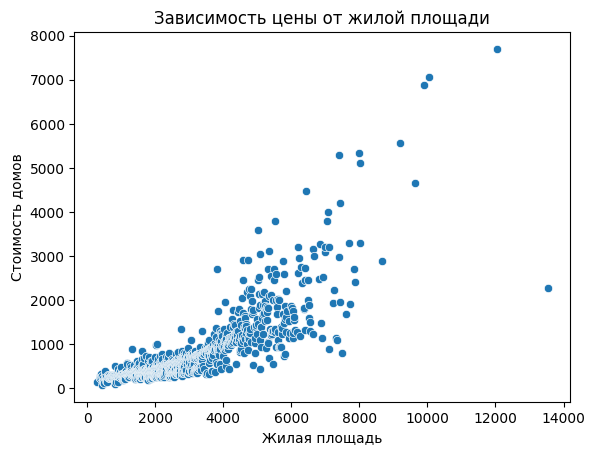

In [20]:
data = df.groupby('sqft_living')['priceAsT'].agg('median').reset_index().sort_values('sqft_living')
sbn.scatterplot(x=data['sqft_living'], y=data['priceAsT'])
plt.title('Зависимость цены от жилой площади')
plt.xlabel("Жилая площадь")
plt.ylabel("Стоимость домов");